# Tarea 2
b) Implemente un procedimiento que permita asignar tiempos correlacionados entre actividades (actividades conectadas entre sí) por medio del método NORTA

In [1]:
import random
import matplotlib.pyplot as plt
import simpy
import networkx as nx  
import numpy as np
from scipy.stats import poisson
from Norta import Norta as Nt

Primero tenemos la clase que define las actividades, utilizando métodos de simpy y modificamos el ejemplo para que el activity process reciba un argumento observation si es que la actividad está correlacionada, para utilizar esté en vez de la distribucion común para todos.

In [18]:
class ActivityProcess(object):
    def __init__(self, env, name, observation = []):
        self.env = env
        self.name = name
        self.observation = observation
        
    def waitup(self, node, myEvent):
        # PEM illustrating "waitevent"# wait for "myEvent" to occur
        evnt = [e.event for e in myEvent]
        yield self.env.all_of(evnt)
        print("The activating event(s) were %s at time %f" %([x.name for x in myEvent], self.env.now))
        tis = self.generate_observation()
        yield self.env.timeout(tis)
        finishtime = self.env.now
        if finishtime > SANglobal.finishtime:
            SANglobal.finishtime = finishtime
        SANglobal.F.nodecomplete[node].event.succeed()
    
    def generate_observation(self):
        if self.observation != []:
            return self.observation
        else:
            return np.random.poisson(lam=3.0)

Clase para iniciar las señales

In [3]:
class StartSignaller(object):
    # here we just schedule some events to fire
    def __init__(self, env, name,sEvent):
        self.env = env
        self.name = name
        self.sEvent = sEvent
        self.env.process(self.startSignals())
        
    def startSignals(self):
        yield self.env.timeout(0)
        self.sEvent.event.succeed()

Y la clase que define el evento

In [4]:
class CustomEvent(object):
    def __init__(self,env, name):
        self.name = name
        self.env = env
        self.event = self.env.event()        

Y aca llamamos a Norta, que generará una observación para las actividades necesarias:

In [6]:
class Norta(object):
    def __init__(self):
        self.env = Nt()
    
    def set_marginal(self,distribucion,**argumento):
        self.env.set_marginal(distribucion,**argumento)
    
    def set_correlation_matrix(self,R):
        self.env.set_corr_matrix(R)
    
    def generate_sample(self,m=1):
        return self.env.generate_sample(m)

Ahora tenemos la clase que contiene los elementos a analiza y guardar a la vez en networkx como grafo

In [7]:
class SANglobal:
    F = nx.DiGraph()
    a = 0
    b = 1
    c = 2
    d = 3
    inTo = 0
    F.add_nodes_from([a, b, c, d])
    F.add_edges_from([(a,b), (a,c), (b,c), (b,d), (c,d)])
    finishtime = 0
    correlated = [{'vertice':(b,c),'corr':0.5}]
    distribution = {b:{'func':'poisson','params':3.0}, #solo las distribuciones de las que estan correlacionadas
                   c:{'func':'poisson','params':3.0}}

Podemos hechar un vistazo

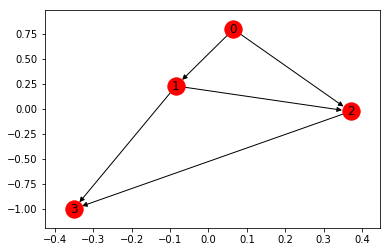

In [8]:
nx.draw_networkx(SANglobal.F)
plt.show()

Poisson function successfully added
Poisson function successfully added
Calculated correlation:
 [[1.  0.5]
 [0.5 1. ]]
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 2.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 6.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 9.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 1.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 2.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 5.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 2.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 2.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 7.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s)

/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:20: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



The activating event(s) were ['Complete 0'] at time 1.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 2.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 7.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 2.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 6.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 8.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 4.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 5.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 6.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 2.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 4.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at t

The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 0.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 5.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 8.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 5.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 9.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 13.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 3.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 7.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 9.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 5.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 7.000000
The ac

The activating event(s) were ['Complete 0'] at time 2.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 7.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 10.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 3.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 6.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 12.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 1.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 2.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 2.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 3.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 6.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at 

The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 2.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 3.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 6.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 4.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 6.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 10.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 2.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 5.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 10.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 4.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 8.000000
The a

The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 5.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 6.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 7.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 2.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 6.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 8.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 4.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 9.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 13.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 1.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 5.000000
The ac

The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 4.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 8.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 11.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 4.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 7.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 10.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 2.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 6.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 9.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 1.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 4.000000
The a

The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 2.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 3.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 6.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 6.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 9.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 12.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 3.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 6.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 10.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 3.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 9.000000
The a

The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 5.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 7.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 10.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 2.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 5.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 8.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 4.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 11.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 13.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 5.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 10.000000
The

The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 1.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 7.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 11.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 8.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 13.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 14.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 4.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 6.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 6.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 4.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 6.000000
The 

The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 0.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 3.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 6.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 5.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 12.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 13.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 4.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 9.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 10.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 3.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 4.000000
The 

The activating event(s) were ['Complete 0'] at time 2.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 9.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 13.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 3.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 6.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 7.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 1.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 6.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 10.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 3.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 10.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at

The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 2.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 3.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 6.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 3.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 7.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 11.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 3.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 5.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 10.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 4.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 8.000000
The a

The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 4.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 8.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 10.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 1.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 4.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 4.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 4.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 7.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 7.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 0.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 8.000000
The ac

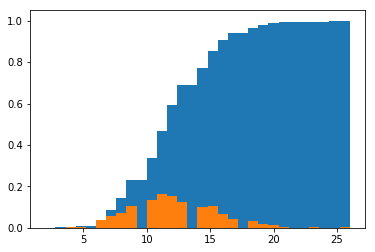

In [19]:
#Creo las observaciones para las actividades correlacionadas
Gen = Norta()
for correlations in SANglobal.correlated:
    for vertice in correlations['vertice']:
        #Gen.set_marginal(SANglobal.distribution[vertice]['func'],mu=SANglobal.distribution[vertice]['params'])
        Gen.set_marginal('poisson',mu=3.0)
    R = [[1, correlations['corr']],[correlations['corr'], 1]] # sólo efectivo para 2 dimensiones
    Gen.set_correlation_matrix(R)

finishtimes = [] #el contenedor de los tiempos de término
for rep in range(1000):
    SANglobal.finishtime = 0 #El tiempo de termino es inicializado
    env = simpy.Environment() #El ambiente es activado
    
    SANglobal.F.nodecomplete= [] #Las actividades que se van completando quedan aca
    for i in range(len(SANglobal.F.nodes())):
        eventname = 'Complete %1d' % i
        SANglobal.F.nodecomplete.append(CustomEvent(env,eventname))
    #SANglobal.F.nodecomplete
    
    muestra = Gen.generate_sample() #genero la muestra que le voy a entregar a las dist correlacionadas
    
    activitynode = []
    for i in range(len(SANglobal.F.nodes())):
        activityname = 'Activity %1d' % i
        if i == SANglobal.correlated[0]['vertice'][0]:
            activitynode.append(ActivityProcess(env,activityname,muestra[0,0]))
        elif i == SANglobal.correlated[0]['vertice'][1]:
            activitynode.append(ActivityProcess(env,activityname,muestra[0,1]))
        else:
            activitynode.append(ActivityProcess(env,activityname))
        
    for i in range(len(SANglobal.F.nodes())):
        if i is not SANglobal.inTo:
            prenodes = SANglobal.F.predecessors(i)
            preevents = [SANglobal.F.nodecomplete[j] for j in prenodes]
            env.process(activitynode[i].waitup(i,preevents))
            
    startevent = CustomEvent(env,'Start')
    sstart = StartSignaller(env,'Signal',startevent).startSignals()
    env.process(activitynode[SANglobal.inTo].waitup(SANglobal.inTo, [startevent]))
    
    env.run(until=50)
    finishtimes.append(SANglobal.finishtime)

plt.hist(finishtimes, bins = 30, density = True, cumulative=True)  
plt.hist(finishtimes, bins = 30, density = True, cumulative=False) 
plt.show()

Para poder compararlo con la situación sin relación rehacemos la anterior simulación

The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 3.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 8.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 10.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 6.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 8.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 11.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 0.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 1.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 6.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 2.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 5.000000
The a

The activating event(s) were ['Complete 1', 'Complete 2'] at time 9.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 3.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 4.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 5.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 1.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 4.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 7.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 0.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 2.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 5.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 2.000000
The act

The activating event(s) were ['Complete 0'] at time 2.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 5.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 5.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 2.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 6.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 13.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 0.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 2.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 7.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 6.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 8.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at t

The activating event(s) were ['Complete 0', 'Complete 1'] at time 2.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 3.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 3.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 6.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 7.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 0.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 4.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 7.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 3.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 5.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 6.000000
The activating event(s) were ['Start'] at time 0.

The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 2.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 3.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 5.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 2.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 4.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 6.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 2.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 6.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 10.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 3.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 7.000000
The ac

The activating event(s) were ['Complete 1', 'Complete 2'] at time 9.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 3.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 5.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 8.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 2.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 5.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 10.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 1.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 2.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 5.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 4.000000
The ac

The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 3.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 7.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 12.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 6.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 9.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 14.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 3.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 5.000000
The activating event(s) were ['Complete 1', 'Complete 2'] at time 6.000000
The activating event(s) were ['Start'] at time 0.000000
The activating event(s) were ['Complete 0'] at time 7.000000
The activating event(s) were ['Complete 0', 'Complete 1'] at time 8.000000
The a

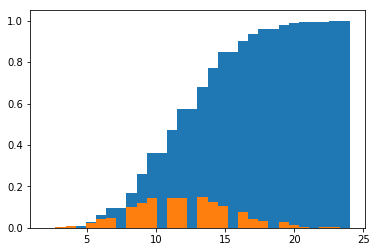

In [20]:
finishtimes2 = [] #el contenedor de los tiempos de término
for rep in range(1000):
    SANglobal.finishtime = 0 #El tiempo de termino es inicializado
    env = simpy.Environment() #El ambiente es activado
    
    SANglobal.F.nodecomplete= [] #Las actividades que se van completando quedan aca
    for i in range(len(SANglobal.F.nodes())):
        eventname = 'Complete %1d' % i
        SANglobal.F.nodecomplete.append(CustomEvent(env,eventname))
    #SANglobal.F.nodecomplete
    
    activitynode = []
    for i in range(len(SANglobal.F.nodes())):
        activityname = 'Activity %1d' % i
        activitynode.append(ActivityProcess(env,activityname))
        
    for i in range(len(SANglobal.F.nodes())):
        if i is not SANglobal.inTo:
            prenodes = SANglobal.F.predecessors(i)
            preevents = [SANglobal.F.nodecomplete[j] for j in prenodes]
            env.process(activitynode[i].waitup(i,preevents))
            
    startevent = CustomEvent(env,'Start')
    sstart = StartSignaller(env,'Signal',startevent).startSignals()
    env.process(activitynode[SANglobal.inTo].waitup(SANglobal.inTo, [startevent]))
    
    env.run(until=50)
    finishtimes2.append(SANglobal.finishtime)

plt.hist(finishtimes2, bins = 30, density = True, cumulative=True)  
plt.hist(finishtimes2, bins = 30, density = True, cumulative=False) 
plt.show()

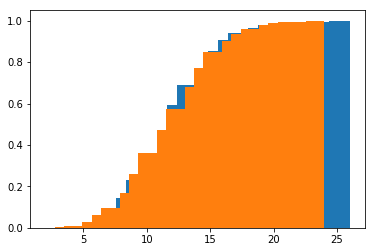

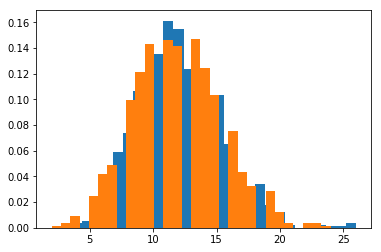

In [21]:
plt.hist(finishtimes, bins = 30, density = True, cumulative=True)
plt.hist(finishtimes2, bins = 30, density = True, cumulative=True)  
plt.show()

plt.hist(finishtimes, bins = 30, density = True, cumulative=False) 
plt.hist(finishtimes2, bins = 30, density = True, cumulative=False) 
plt.show()

Se ven algunas diferencias claras, por ejemplo que en este caso el color marcado con azul, que es el caso con la correlación se demorá efectivamente más, como